### Disclaimer

The following document was made following the course "Intro to Machine Learning" from Kaggle. 

All references can be traced back to the following link: https://www.kaggle.com/learn/intro-to-machine-learning

# Decision tree

A decision tree in machine learning is a powerful and intuitive model used for both classification and regression tasks.

In this notebook we will practise the basics to categorize and predict house prizing applying this methodology.

In [82]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from typing import List
from sklearn.ensemble import RandomForestRegressor

## Selecting Data for Modeling

It is important to depurate the information and identify the valuable data. In the following code, we will review our data set and select our values.

In [83]:
housing_data = pd.read_csv("melb_data.csv")
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [84]:
housing_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [85]:
# Drop data lines with missing information.
housing_data = housing_data.dropna(axis=0)

## Selecting The Prediction Target

As we introduced, we will select the Price variable as our Prediction Taget. We will use the dot notation to select the corresponding Index.

By convention, this data is called y.

In [86]:
y = housing_data.Price

## Choosing "Features"

The "features" are the values we will use to determine our prediction. We could use all of the columns of the data set, but not all the information may be relevant for our prediction. For now, we will select 'Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude' as the inputs for our prediction.

By convention, this data is called X.

In [87]:
feature_names = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = housing_data[feature_names]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [88]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Building Our Model

To create our model, we will use the scikit-learn library (`sklearn`). For that, we will need to define:
- Type of model: In our case a decision tree.
- Fit: Capture patterns from provided data.
- Predict: The value to be obtained.
- Evaluate: Determine how accurate the model's predictions are.

In [89]:
# Defined at the head of the program
# from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
housing_model = DecisionTreeRegressor(random_state=1)

# Fit model
housing_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

When doing a model, we will want to make predictions for new inputs rather than for the data we already have. But we'll make predictions for the first few rows of the training data to see how the predict function works. As we can see, the values obtained by the model are the same as the initial data.

In [90]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(housing_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [91]:
housing_data.Price.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

# Model Validation

Now that we programmed our model, we need to know how accurate it is. There are many metrics for summarizing model quality, for these code we'll use the Mean Absolute Error (MAE).

$MAE = Real Value − Predicted Value$

This value essentially indicates how off our predictions are.

In [92]:
# Defined at the head of the program
# from sklearn.metrics import mean_absolute_error

predicted_home_prices = housing_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

### "In-Sample" Scores

The validation we just made is an "in-sample" score. Meaning we used data from our data set for both building the model and evaluating it. This is a malpractice, because the model could have used non relevant data to adjust the decision tree. The following example from Kaggle explains this issue perfectly.

>"Imagine that, in the large real estate market, door color is unrelated to home price. However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

>Since this pattern was derived from the training data, the model will appear accurate in the training data. But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice."

The validation of models must come from making predictions on new data (out of sample score). The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data. 

Following this methodology, we will use the `train_test_function` to divide our data set randomly. One part will be used to fit the model and the other to validate it.

In [93]:
# Defined at the head of the program
# from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

housing_model = DecisionTreeRegressor()

housing_model.fit(train_X, train_y)

val_predictions = housing_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

272140.74607273506


## Results analysis

With an in sample score the MAE is 1115.7, while with an out of sample score is much higher 273930.4. While the in sample MAE is lower, the out of sample shows that our model is innadequate.  As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

To improve this model we will experiment with a different model type.

# Experimenting With Different Models

Before trying a new model, is important to understand that models can suffer from either:

• Overfitting: Dividing the data in many leaves, crerating therefore many categories with fewer samples each. While this will perfectly match the training data, it will do poorly in validation and predictions for new data. In other words, we will capture spurious patterns that won't recur in the future, leading to less accurate predictions.

• Underfitting: On the other hand, if we limit too much the leaves of our decision tree, we will fail to capture relevant patterns. Again leading to less accurate predictions, even in training data.

![Graph extracted from Kaggle course](attachment:a7768b93-8ba4-4faf-8e1c-9bde4f49fb48.png "Graph extracted from Kaggle course")

There are a few alternatives for controlling the tree depth. We will use the `max_leaf_nodes` argument in the following code. This provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.
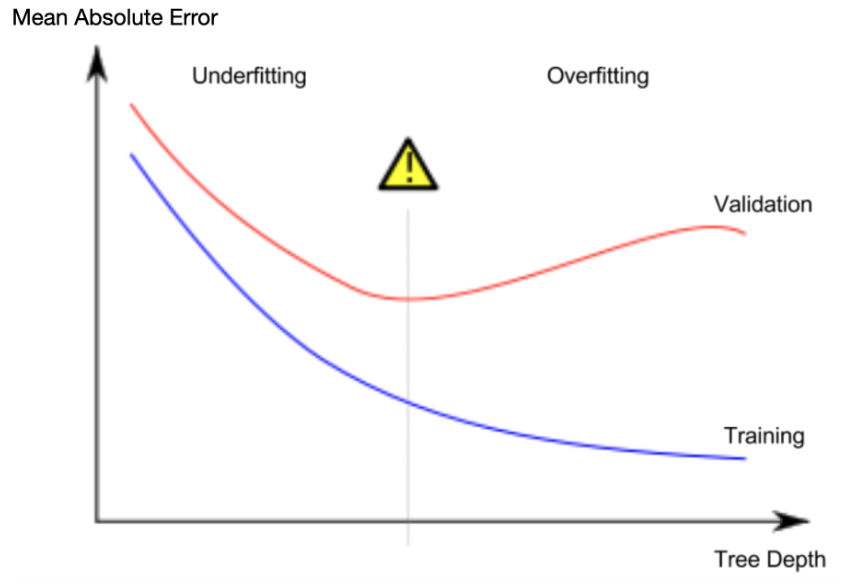

In [94]:
# Defined at the head of the program
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error

def get_mae_DTR(max_leaf_nodes, train_X, val_X, train_y, val_y):

    """
    Trains a Decision Tree Regressor (DTR) with the specified number of leaf nodes
    and returns the Mean Absolute Error (MAE) on the validation set.

    Args:
        max_leaf_nodes (int): Maximum number of leaf nodes for the decision tree.
        train_X (pd.DataFrame): Training feature set.
        val_X (pd.DataFrame): Validation feature set.
        train_y (np.ndarray): Target values for training.
        val_y (np.ndarray): Target values for validation.

    Returns:
        float: Mean Absolute Error of the model's predictions on the validation set.

    Example:
        >>> get_mae(100, train_X, val_X, train_y, val_y)
        3.21
    """
    
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [95]:
# Defined at the head of the program
# from typing import List

def get_optimal_nodes(train_X: pd.DataFrame,
                      val_X: pd.DataFrame,
                      train_y: np.ndarray,
                      val_y: np.ndarray,
                      candidate_nodes: List[int] = [5, 50, 500, 5000]):

    """
    Evaluates a Decision Tree Regressor across multiple max_leaf_nodes values.
    Prints the Mean Absolute Error (MAE) for each configuration.

    Args:
        train_X (pd.DataFrame): Training feature set.
        val_X (pd.DataFrame): Validation feature set.
        train_y (np.ndarray): Target values for training.
        val_y (np.ndarray): Target values for validation.
        candidate_nodes (List[int], optional): List of max_leaf_nodes values to evaluate.
            Defaults to [5, 50, 500, 5000].

    Returns:
        None: Prints MAE for each max_leaf_nodes value.

    Example:
        >>> get_optimal_nodes(train_X, val_X, train_y, val_y)
        Max leaf nodes: 5      | Mean Absolute Error:  34.2
        Max leaf nodes: 50     | Mean Absolute Error:  28.7
        ...
    """
    
    for max_leaf_nodes in candidate_nodes:
        my_mae = get_mae_DTR(max_leaf_nodes, train_X, val_X, train_y, val_y)
        print(f"Max leaf nodes: {max_leaf_nodes:<6} | Mean Absolute Error: {my_mae:.2f}")

In [96]:
get_optimal_nodes(train_X, val_X, train_y, val_y)

Max leaf nodes: 5      | Mean Absolute Error: 385696.54
Max leaf nodes: 50     | Mean Absolute Error: 279794.61
Max leaf nodes: 500    | Mean Absolute Error: 261718.11
Max leaf nodes: 5000   | Mean Absolute Error: 271320.97


## Results analysis

With these two functions we can confirm that the optimal number for `max_leaf_nodes` is 500.

# Random forest

In comparison with the Decision Tree model the Random Forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. 

In [97]:
# Defined at the head of the program
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146


With this model we can see that the MAE is lower. The result obtained with the Decision Tree model was 273930.4.

In [98]:
def get_mae_RFR(max_leaf_nodes, train_X, val_X, train_y, val_y):

    """
    Trains a Random Forest Regressor (RFR) with the specified number of leaf nodes
    and returns the Mean Absolute Error (MAE) on the validation set.

    Args:
        max_leaf_nodes (int): Maximum number of leaf nodes for the decision tree.
        train_X (pd.DataFrame): Training feature set.
        val_X (pd.DataFrame): Validation feature set.
        train_y (np.ndarray): Target values for training.
        val_y (np.ndarray): Target values for validation.

    Returns:
        float: Mean Absolute Error of the model's predictions on the validation set.

    Example:
        >>> get_mae_RFR(100, train_X, val_X, train_y, val_y)
        3.21
    """
    
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [99]:
def get_optimal_model(train_X: pd.DataFrame,
                      val_X: pd.DataFrame,
                      train_y: np.ndarray,
                      val_y: np.ndarray,
                      candidate_nodes: List[int] = [5, 50, 500, 5000]):

    """
    Updated version of get_optimal_nodes to valuate a Decision Tree and Random Tree Regressor across multiple max_leaf_nodes values.
    Prints the Mean Absolute Error (MAE) for each configuration.

    Args:
        train_X (pd.DataFrame): Training feature set.
        val_X (pd.DataFrame): Validation feature set.
        train_y (np.ndarray): Target values for training.
        val_y (np.ndarray): Target values for validation.
        candidate_nodes (List[int], optional): List of max_leaf_nodes values to evaluate.
            Defaults to [5, 50, 500, 5000].

    Returns:
        None: Prints MAE for each max_leaf_nodes value.

    Example:
        >>> get_optimal_nodes(train_X, val_X, train_y, val_y)
        Max leaf nodes: 5      | Mean Absolute Error:  34.2
        Max leaf nodes: 50     | Mean Absolute Error:  28.7
        ...
    """
    print (f"Decision Tree Regressor:")
    for max_leaf_nodes in candidate_nodes:
        my_mae = get_mae_DST(max_leaf_nodes, train_X, val_X, train_y, val_y)
        print(f"Max leaf nodes: {max_leaf_nodes:<6} | Mean Absolute Error: {my_mae:.2f}")

    print (f"\nRandom Forest Regressor:")
    for max_leaf_nodes in candidate_nodes:
        my_mae = get_mae_RFR(max_leaf_nodes, train_X, val_X, train_y, val_y)
        print(f"Max leaf nodes: {max_leaf_nodes:<6} | Mean Absolute Error: {my_mae:.2f}")

In [100]:
get_optimal_model(train_X, val_X, train_y, val_y)

Decision Tree Regressor:
Max leaf nodes: 5      | Mean Absolute Error: 385696.54
Max leaf nodes: 50     | Mean Absolute Error: 279794.61
Max leaf nodes: 500    | Mean Absolute Error: 261718.11
Max leaf nodes: 5000   | Mean Absolute Error: 271320.97

Random Forest Regressor:
Max leaf nodes: 5      | Mean Absolute Error: 375869.98
Max leaf nodes: 50     | Mean Absolute Error: 252233.10
Max leaf nodes: 500    | Mean Absolute Error: 208267.63
Max leaf nodes: 5000   | Mean Absolute Error: 206811.09


## Results analysis

With these two functions we can confirm that the optimal model is the **Random Forest** with: 
- `max_leaf_nodes` = 5000
- MAE = 206811.09